# Importera paket

In [ ]:
from fastai.tabular.all import *
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Wind_Turbine_Data_ML.csv to Wind_Turbine_Data_ML.csv


In [ ]:
!ls

sample_data  Wind_Turbine_Data_ML.csv


In [ ]:
df = pd.read_csv('Wind_Turbine_Data_ML.csv')
df.head()

,WT1 - Wind speed (m/s),"WT1 - Wind speed, Standard deviation (m/s)","WT1 - Wind speed, Minimum (m/s)","WT1 - Wind speed, Maximum (m/s)",WT1 - Wind direction (°),WT1 - Nacelle position (°),WT1 - Power (kW),WT1 - Rotor speed (RPM),WT1 - Generator RPM (RPM),WT1 - Blade angle (pitch position) (°),WT1 - Blade angle (pitch position) A (°),WT1 - Blade angle (pitch position) B (°),WT1 - Blade angle (pitch position) C (°)
0,6.1,0.2,5.4,6.7,237.7,236.5,649.7,9.3,1047.4,-1.9,-1.898214,-1.898214,-1.891071
1,6.1,0.2,5.4,6.7,237.7,236.5,649.7,9.3,1047.4,-1.9,-1.898214,-1.898214,-1.891071
2,6.4,0.4,5.4,7.4,234.6,237.2,785.0,9.8,1097.9,-1.9,-1.883019,-1.879245,-1.883019
3,6.4,0.4,5.4,7.4,234.6,237.2,785.0,9.8,1097.9,-1.9,-1.883019,-1.879245,-1.883019
4,7.0,0.3,6.1,8.0,239.4,238.7,859.3,10.7,1192.5,-1.9,-1.887273,-1.812727,-1.869091


In [ ]:
df.columns

Index(['WT1 - Wind speed (m/s)', 'WT1 - Wind speed, Standard deviation (m/s)',
       'WT1 - Wind speed, Minimum (m/s)', 'WT1 - Wind speed, Maximum (m/s)',
       'WT1 - Wind direction (°)', 'WT1 - Nacelle position (°)',
       'WT1 - Power (kW)', 'WT1 - Rotor speed (RPM)',
       'WT1 - Generator RPM (RPM)', 'WT1 - Blade angle (pitch position) (°)',
       'WT1 - Blade angle (pitch position) A (°)',
       'WT1 - Blade angle (pitch position) B (°)',
       'WT1 - Blade angle (pitch position) C (°)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   WT1 - Wind speed (m/s)                      288 non-null    float64
 1   WT1 - Wind speed, Standard deviation (m/s)  270 non-null    float64
 2   WT1 - Wind speed, Minimum (m/s)             288 non-null    float64
 3   WT1 - Wind speed, Maximum (m/s)             288 non-null    float64
 4   WT1 - Wind direction (°)                    288 non-null    float64
 5   WT1 - Nacelle position (°)                  288 non-null    float64
 6   WT1 - Power (kW)                            288 non-null    float64
 7   WT1 - Rotor speed (RPM)                     288 non-null    float64
 8   WT1 - Generator RPM (RPM)                   288 non-null    float64
 9   WT1 - Blade angle (pitch position) (°)      288 non-null    float64
 10  WT1 - Blade an

In [ ]:
dls = TabularDataLoaders.from_csv('Wind_Turbine_Data_ML.csv',
    y_names=['WT1 - Nacelle position (°)', 'WT1 - Power (kW)', 'WT1 - Rotor speed (RPM)', 'WT1 - Generator RPM (RPM)', 'WT1 - Blade angle (pitch position) (°)', 'WT1 - Blade angle (pitch position) A (°)', 'WT1 - Blade angle (pitch position) B (°)','WT1 - Blade angle (pitch position) C (°)'],
    cat_names = [],
    cont_names = ['WT1 - Wind speed (m/s)', 'WT1 - Wind speed, Standard deviation (m/s)', 'WT1 - Wind speed, Minimum (m/s)', 'WT1 - Wind speed, Maximum (m/s)', 'WT1 - Wind direction (°)'],
    procs = [Categorify, FillMissing, Normalize],
    bs = 64)

In [ ]:
dls.show_batch()

,"WT1 - Wind speed, Standard deviation (m/s)_na",WT1 - Wind speed (m/s),"WT1 - Wind speed, Standard deviation (m/s)","WT1 - Wind speed, Minimum (m/s)","WT1 - Wind speed, Maximum (m/s)",WT1 - Wind direction (°),WT1 - Nacelle position (°),WT1 - Power (kW),WT1 - Rotor speed (RPM),WT1 - Generator RPM (RPM),WT1 - Blade angle (pitch position) (°),WT1 - Blade angle (pitch position) A (°),WT1 - Blade angle (pitch position) B (°),WT1 - Blade angle (pitch position) C (°)
0,False,6.9,0.7,4.1,8.7,137.899994,137.600006,962.500000,10.4,1177.800049,-2.0,-1.996552,-1.993103,-1.996552
1,False,6.9,0.4,5.9,8.2,120.000000,117.900002,953.000000,10.4,1181.400024,-1.8,-1.856140,-1.852632,-1.856140
2,False,3.6,0.6,2.2,4.9,259.600003,260.899994,144.300003,5.7,637.400024,-1.7,-1.515790,-1.514035,-1.496491
3,False,6.4,0.4,5.4,7.4,234.600004,237.199997,785.000000,9.8,1097.900024,-1.9,-1.883019,-1.879245,-1.883019
4,False,8.0,0.4,6.5,9.4,95.000001,95.699997,1528.300049,11.9,1336.000000,-2.5,-2.475000,-2.464286,-2.478571
5,True,1.7,0.4,1.4,1.9,170.300003,205.100006,-7.900000,0.0,0.000000,14.0,14.000000,14.000000,14.000000
6,False,9.5,0.9,6.5,11.5,90.699995,89.099998,2429.600098,12.8,1425.800049,-2.9,-3.246552,-3.255172,-3.239655
7,False,5.7,0.5,4.7,7.1,136.100006,137.600006,490.799988,8.7,977.599976,-1.9,-1.920690,-1.915517,-1.927586
8,False,7.7,0.3,7.0,8.7,142.800003,144.300003,1161.699951,11.6,1288.900024,-2.5,-2.512727,-2.509091,-2.510909
9,True,1.4,0.4,1.3,1.6,160.199997,205.100006,-8.200000,0.0,0.000000,14.0,14.000000,14.000000,14.000000


In [ ]:
learn = tabular_learner(dls)

SuggestedLRs(valley=0.14454397559165955)

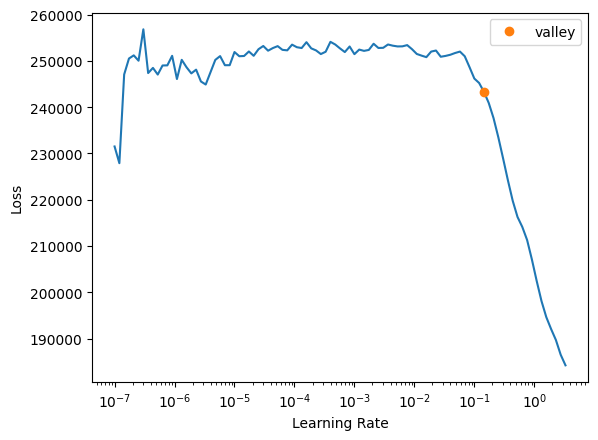

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, lr_max=0.5)

epoch,train_loss,valid_loss,time
0,244259.093750,219182.468750,00:00


In [ ]:
learn.show_results()

,"WT1 - Wind speed, Standard deviation (m/s)_na",WT1 - Wind speed (m/s),"WT1 - Wind speed, Standard deviation (m/s)","WT1 - Wind speed, Minimum (m/s)","WT1 - Wind speed, Maximum (m/s)",WT1 - Wind direction (°),WT1 - Nacelle position (°),WT1 - Power (kW),WT1 - Rotor speed (RPM),WT1 - Generator RPM (RPM),WT1 - Blade angle (pitch position) (°),WT1 - Blade angle (pitch position) A (°),WT1 - Blade angle (pitch position) B (°),WT1 - Blade angle (pitch position) C (°),WT1 - Nacelle position (°)_pred,WT1 - Power (kW)_pred,WT1 - Rotor speed (RPM)_pred,WT1 - Generator RPM (RPM)_pred,WT1 - Blade angle (pitch position) (°)_pred,WT1 - Blade angle (pitch position) A (°)_pred,WT1 - Blade angle (pitch position) B (°)_pred,WT1 - Blade angle (pitch position) C (°)_pred
0,1.0,0.484769,-0.212872,0.600032,0.501450,-0.527970,120.199997,887.599976,10.4,1154.300049,-1.9,-1.861403,-1.861403,-1.864912,-0.930770,3.110981,1.167498,1.828760,-0.759110,-0.847365,-1.313436,-1.003516
1,1.0,0.072314,1.468272,-0.575852,0.223835,-0.813487,105.500000,507.399994,9.0,983.900024,-2.0,-2.009091,-2.009091,-2.012727,-0.603633,1.415015,0.686829,0.610549,-0.316788,-0.399340,-0.574225,-0.410187
2,1.0,0.979716,-0.212872,1.285964,0.813767,-0.382484,130.699997,1466.300049,11.9,1324.099976,-2.3,-2.273684,-2.273684,-2.270175,-1.698854,5.259765,1.805446,2.836962,-1.071705,-1.252731,-2.034684,-1.693957
3,1.0,-1.165052,-0.212872,-1.261784,-0.886626,1.910744,250.600006,53.299999,5.4,600.099976,-0.4,-0.366071,-0.362500,-0.366071,2.051173,-6.593002,-1.629560,-4.077869,2.400492,1.429579,3.264478,2.271299
4,1.0,-0.587615,0.627700,-0.918818,-0.435501,1.938023,260.399994,210.899994,6.6,719.500000,-1.8,-1.889286,-1.878571,-1.889286,1.575609,-4.293105,-1.044331,-2.601003,1.537921,0.751590,2.045785,1.565471
5,1.0,1.227189,-0.212872,1.432949,1.056680,-1.033535,94.599998,1762.099976,12.2,1368.199951,-3.1,-3.010526,-3.019298,-3.007018,-2.316470,6.890871,2.326301,3.601456,-1.294752,-1.603782,-2.672825,-2.259951
6,1.0,-1.412526,-1.473731,-1.212789,-1.476558,0.284934,167.899994,-15.000000,2.4,276.899994,14.0,14.000000,14.000000,14.000000,1.717531,-6.600207,-1.911870,-4.632137,2.423217,1.645568,3.641925,2.096766
7,1.0,1.185943,1.047986,0.845007,1.160786,-1.086274,91.599998,1697.099976,11.9,1349.099976,-3.0,-3.070370,-3.066667,-3.070370,-2.509946,7.193803,2.463232,3.335835,-1.193959,-1.571802,-2.676580,-2.450306
8,1.0,0.897225,-0.633158,1.236969,0.779065,-0.118790,143.600006,1206.099976,11.6,1295.099976,-2.3,-2.258182,-2.245455,-2.252727,-1.248010,4.246770,1.401059,2.483432,-0.909891,-1.049067,-1.682691,-1.255902


In [ ]:
learn.fit_one_cycle(50, lr_max=0.5)

epoch,train_loss,valid_loss,time
0,206175.656250,231171.343750,00:00
1,212605.671875,219831.046875,00:00
2,209144.953125,193602.671875,00:00
3,203029.125000,154766.765625,00:00
4,188827.000000,120401.632812,00:00
5,167226.531250,171102.828125,00:00
6,146090.000000,269900.031250,00:00
7,127632.562500,139104.453125,00:00
8,115123.906250,412329.312500,00:00
9,102709.242188,265475.562500,00:00


In [ ]:
learn.show_results()

,"WT1 - Wind speed, Standard deviation (m/s)_na",WT1 - Wind speed (m/s),"WT1 - Wind speed, Standard deviation (m/s)","WT1 - Wind speed, Minimum (m/s)","WT1 - Wind speed, Maximum (m/s)",WT1 - Wind direction (°),WT1 - Nacelle position (°),WT1 - Power (kW),WT1 - Rotor speed (RPM),WT1 - Generator RPM (RPM),WT1 - Blade angle (pitch position) (°),WT1 - Blade angle (pitch position) A (°),WT1 - Blade angle (pitch position) B (°),WT1 - Blade angle (pitch position) C (°),WT1 - Nacelle position (°)_pred,WT1 - Power (kW)_pred,WT1 - Rotor speed (RPM)_pred,WT1 - Generator RPM (RPM)_pred,WT1 - Blade angle (pitch position) (°)_pred,WT1 - Blade angle (pitch position) A (°)_pred,WT1 - Blade angle (pitch position) B (°)_pred,WT1 - Blade angle (pitch position) C (°)_pred
0,1.0,-1.371280,-0.633158,-1.408770,-1.303049,1.610679,241.199997,-27.200001,4.8,536.599976,7.4,8.250000,8.250000,8.250000,226.704117,35.814312,3.914895,414.945190,6.223249,6.489836,6.312295,6.549750
1,1.0,-1.536262,-0.212872,-1.800731,-1.372452,1.767076,233.300003,-12.000000,3.6,414.500000,8.1,6.970909,6.974545,6.970909,234.298569,0.216811,2.842346,322.819794,9.834000,10.027486,9.776657,9.919435
2,2.0,-1.659999,-0.212872,-1.506760,-1.684770,0.790500,233.300003,-25.799999,0.0,0.000000,14.0,14.000000,14.000000,14.000000,225.814682,-9.720562,0.313055,-12.807108,14.837110,14.919898,15.257713,15.267587
3,1.0,0.031068,1.468272,-0.330876,0.189133,-1.328145,81.699997,484.399994,8.7,951.099976,-2.0,-2.010345,-2.005172,-2.010345,79.722366,503.729370,8.446078,948.799805,-1.666351,-1.523443,-1.907797,-1.508773
4,1.0,-1.000070,0.207414,-1.163794,-0.921328,2.010766,258.200012,72.400002,5.4,604.299988,-1.1,-1.000000,-0.992308,-0.994231,248.227890,97.509674,5.525785,581.036865,0.192567,0.410889,0.454186,0.755719
5,1.0,0.031068,-1.053445,0.355056,-0.088482,0.008510,151.399994,511.500000,8.7,966.299988,-1.8,-1.803390,-1.803390,-1.806780,155.041550,483.065155,8.162016,950.108459,-1.834659,-2.039151,-2.059824,-1.720468
6,1.0,0.072314,1.468272,-0.575852,0.223835,-0.813487,105.500000,507.399994,9.0,983.900024,-2.0,-2.009091,-2.009091,-2.012727,102.019783,501.048523,8.269956,952.333984,-1.534473,-1.498685,-1.826854,-1.382181
7,1.0,0.690997,1.047986,-0.281881,0.952574,-0.384303,129.100006,988.799988,11.0,1219.599976,-2.1,-2.211111,-2.198148,-2.205555,120.494995,973.414246,11.021898,1187.462036,-1.968571,-1.868467,-2.054574,-1.503192
8,1.0,0.484769,-0.212872,0.600032,0.501450,-0.527970,120.199997,887.599976,10.4,1154.300049,-1.9,-1.861403,-1.861403,-1.864912,121.739632,832.404114,10.058144,1128.767944,-1.874298,-1.897936,-1.924268,-1.454569


In [ ]:
learn.fit_one_cycle(50, lr_max=0.5)

epoch,train_loss,valid_loss,time
0,1924.187500,800.920227,00:00
1,1738.993530,606.977112,00:00
2,1412.457520,440.846313,00:00
3,1254.498291,512.331909,00:00
4,1454.805420,502.794281,00:00
5,1457.505249,824.708191,00:00
6,1965.365356,4109.986816,00:00
7,1997.785522,2929.163330,00:00
8,2802.241699,2008.188354,00:00
9,2834.188721,6294.706055,00:00


In [ ]:
learn.show_results()

,"WT1 - Wind speed, Standard deviation (m/s)_na",WT1 - Wind speed (m/s),"WT1 - Wind speed, Standard deviation (m/s)","WT1 - Wind speed, Minimum (m/s)","WT1 - Wind speed, Maximum (m/s)",WT1 - Wind direction (°),WT1 - Nacelle position (°),WT1 - Power (kW),WT1 - Rotor speed (RPM),WT1 - Generator RPM (RPM),WT1 - Blade angle (pitch position) (°),WT1 - Blade angle (pitch position) A (°),WT1 - Blade angle (pitch position) B (°),WT1 - Blade angle (pitch position) C (°),WT1 - Nacelle position (°)_pred,WT1 - Power (kW)_pred,WT1 - Rotor speed (RPM)_pred,WT1 - Generator RPM (RPM)_pred,WT1 - Blade angle (pitch position) (°)_pred,WT1 - Blade angle (pitch position) A (°)_pred,WT1 - Blade angle (pitch position) B (°)_pred,WT1 - Blade angle (pitch position) C (°)_pred
0,1.0,0.897225,-0.633158,1.334959,0.709661,-0.149706,144.300003,1161.699951,11.6,1288.900024,-2.5,-2.512727,-2.509091,-2.510909,139.451599,1243.520020,11.345708,1271.660645,-1.598386,-2.232382,-2.070994,-1.634521
1,1.0,0.484769,0.627700,0.355056,0.432046,-0.437041,129.100006,829.000000,10.4,1155.500000,-1.9,-1.920690,-1.917241,-1.917241,128.907318,827.079773,10.163795,1112.609863,-2.113472,-2.234857,-2.135241,-1.685598
2,1.0,-1.371280,-1.473731,-1.212789,-1.441856,0.093984,155.899994,-15.700000,2.4,279.299988,14.0,14.000000,14.000000,14.000000,164.226364,18.881002,2.087713,253.006165,11.421997,11.673732,11.372339,11.858385
3,1.0,1.268435,1.468272,0.453046,1.264892,-0.771660,108.900002,1741.500000,12.2,1362.300049,-3.2,-3.308475,-3.301695,-3.298305,99.827408,1744.129883,12.042118,1337.939453,-1.391970,-1.886783,-1.992562,-1.525613
4,1.0,0.484769,-0.212872,0.600032,0.501450,-0.527970,120.199997,887.599976,10.4,1154.300049,-1.9,-1.861403,-1.861403,-1.864912,128.269653,838.295532,10.202361,1118.805542,-2.111093,-2.206151,-2.115562,-1.688113
5,1.0,0.031068,1.468272,-0.330876,0.189133,-1.328145,81.699997,484.399994,8.7,951.099976,-2.0,-2.010345,-2.005172,-2.010345,87.192604,507.772644,8.555935,950.554260,-1.770056,-1.624502,-1.279329,-1.720734
6,1.0,1.845872,2.308845,1.726920,2.271247,-0.911691,100.699997,2673.800049,12.8,1440.500000,-2.5,-2.726316,-2.717544,-2.717544,90.498985,2588.725830,12.630365,1418.234375,-1.384144,-2.066424,-3.295368,-1.371233
7,2.0,-1.701244,-0.212872,-1.457765,-1.754173,0.166727,205.100006,-8.200000,0.0,0.000000,14.0,14.000000,14.000000,14.000000,198.917007,-25.351381,-0.284057,-46.606453,16.243809,16.410988,16.934034,16.204582
8,1.0,-1.618753,-1.473731,-1.506760,-1.650068,2.079872,233.300003,-25.500000,1.8,192.500000,14.0,14.000000,14.000000,14.000000,253.963379,-17.344200,2.749834,312.757843,10.449762,10.196573,9.808023,10.142325


In [ ]:
learn.fit_one_cycle(500, lr_max=0.5)

epoch,train_loss,valid_loss,time
0,3689.154541,472.633209,00:00
1,2373.285889,397.648102,00:00
2,2095.178711,370.527283,00:00
3,1766.607178,484.949677,00:00
4,1971.245605,699.177856,00:00
5,1925.173218,687.079224,00:00
6,1695.194092,550.800842,00:00
7,1545.182983,515.756592,00:00
8,1746.825195,911.625671,00:00
9,1996.505859,768.579651,00:00


In [ ]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=8, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=8, bias=True)
    )
  )
)